# üì¶ Entrega 2 ‚Äì Compara√ß√£o com YOLOv5 Padr√£o

Este notebook complementa o trabalho realizado na Entrega 1, onde foi utilizado um modelo YOLOv5 customizado.

Aqui, utilizamos o modelo **`yolov5s.pt`** pr√©-treinado para detectar as mesmas classes: **`safety_helmet`** e **`drone`**, usando o mesmo dataset rotulado. O objetivo √© comparar os resultados e avaliar os pontos fortes e limita√ß√µes de cada abordagem.


## üîó Montar Google Drive

Montamos o Google Drive para garantir que todos os arquivos do projeto, incluindo dataset, anota√ß√µes e resultados, estejam salvos de forma persistente e acess√≠vel entre sess√µes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## üì¶ Clonar YOLOv5 dentro do Drive

Clonamos o reposit√≥rio oficial da YOLOv5 diretamente no Drive para preservar os arquivos e possibilitar modifica√ß√µes, mesmo ap√≥s desconex√µes do Colab.

In [2]:
%cd /content/drive/MyDrive/FIAP/FASE 6/Entrega 2/
!mkdir -p yolov5_colab
%cd yolov5_colab
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

/content/drive/MyDrive/FIAP/FASE 6/Entrega 2
/content/drive/MyDrive/FIAP/FASE 6/Entrega 2/yolov5_colab
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/FIAP/FASE 6/Entrega 2/yolov5_colab/yolov5
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 68.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

## üìÅ Verificar o arquivo `data.yaml`

Verificamos se o arquivo `data.yaml` est√° configurado corretamente com os caminhos para as imagens de treino e valida√ß√£o, al√©m dos nomes das classes.

In [3]:
!cat "/content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/data.yaml"

train: /content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/images/train
val: /content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/images/val

nc: 2
names: ['safety_helment', 'drone']


## üöÄ Iniciar o treinamento com YOLOv5

Executamos o treinamento com o modelo pr√©-treinado `yolov5s.pt`, por 30 √©pocas, utilizando nosso dataset rotulado. A ideia √© observar como um modelo gen√©rico se comporta sem adapta√ß√µes espec√≠ficas ao dom√≠nio.

In [4]:
!python train.py --img 640 --batch 16 --epochs 30 \
--data "/content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/data.yaml" \
--weights yolov5s.pt --name treino_yolo_padrao

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ‚ö†Ô∏è wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-23 11:51:47.626890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745409107.932765    2398 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745409108.016580    2398 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuB

## üìä Visualizar gr√°fico de resultados

Os gr√°ficos de treinamento mostram a evolu√ß√£o das perdas e m√©tricas como precis√£o, recall, `mAP@0.5` e `mAP@0.5:0.95`.

A performance geral foi **moderada**, com mAP@0.5 em torno de **0.28** e mAP@0.5:0.95 pr√≥ximo de **0.25**, abaixo da vers√£o customizada.

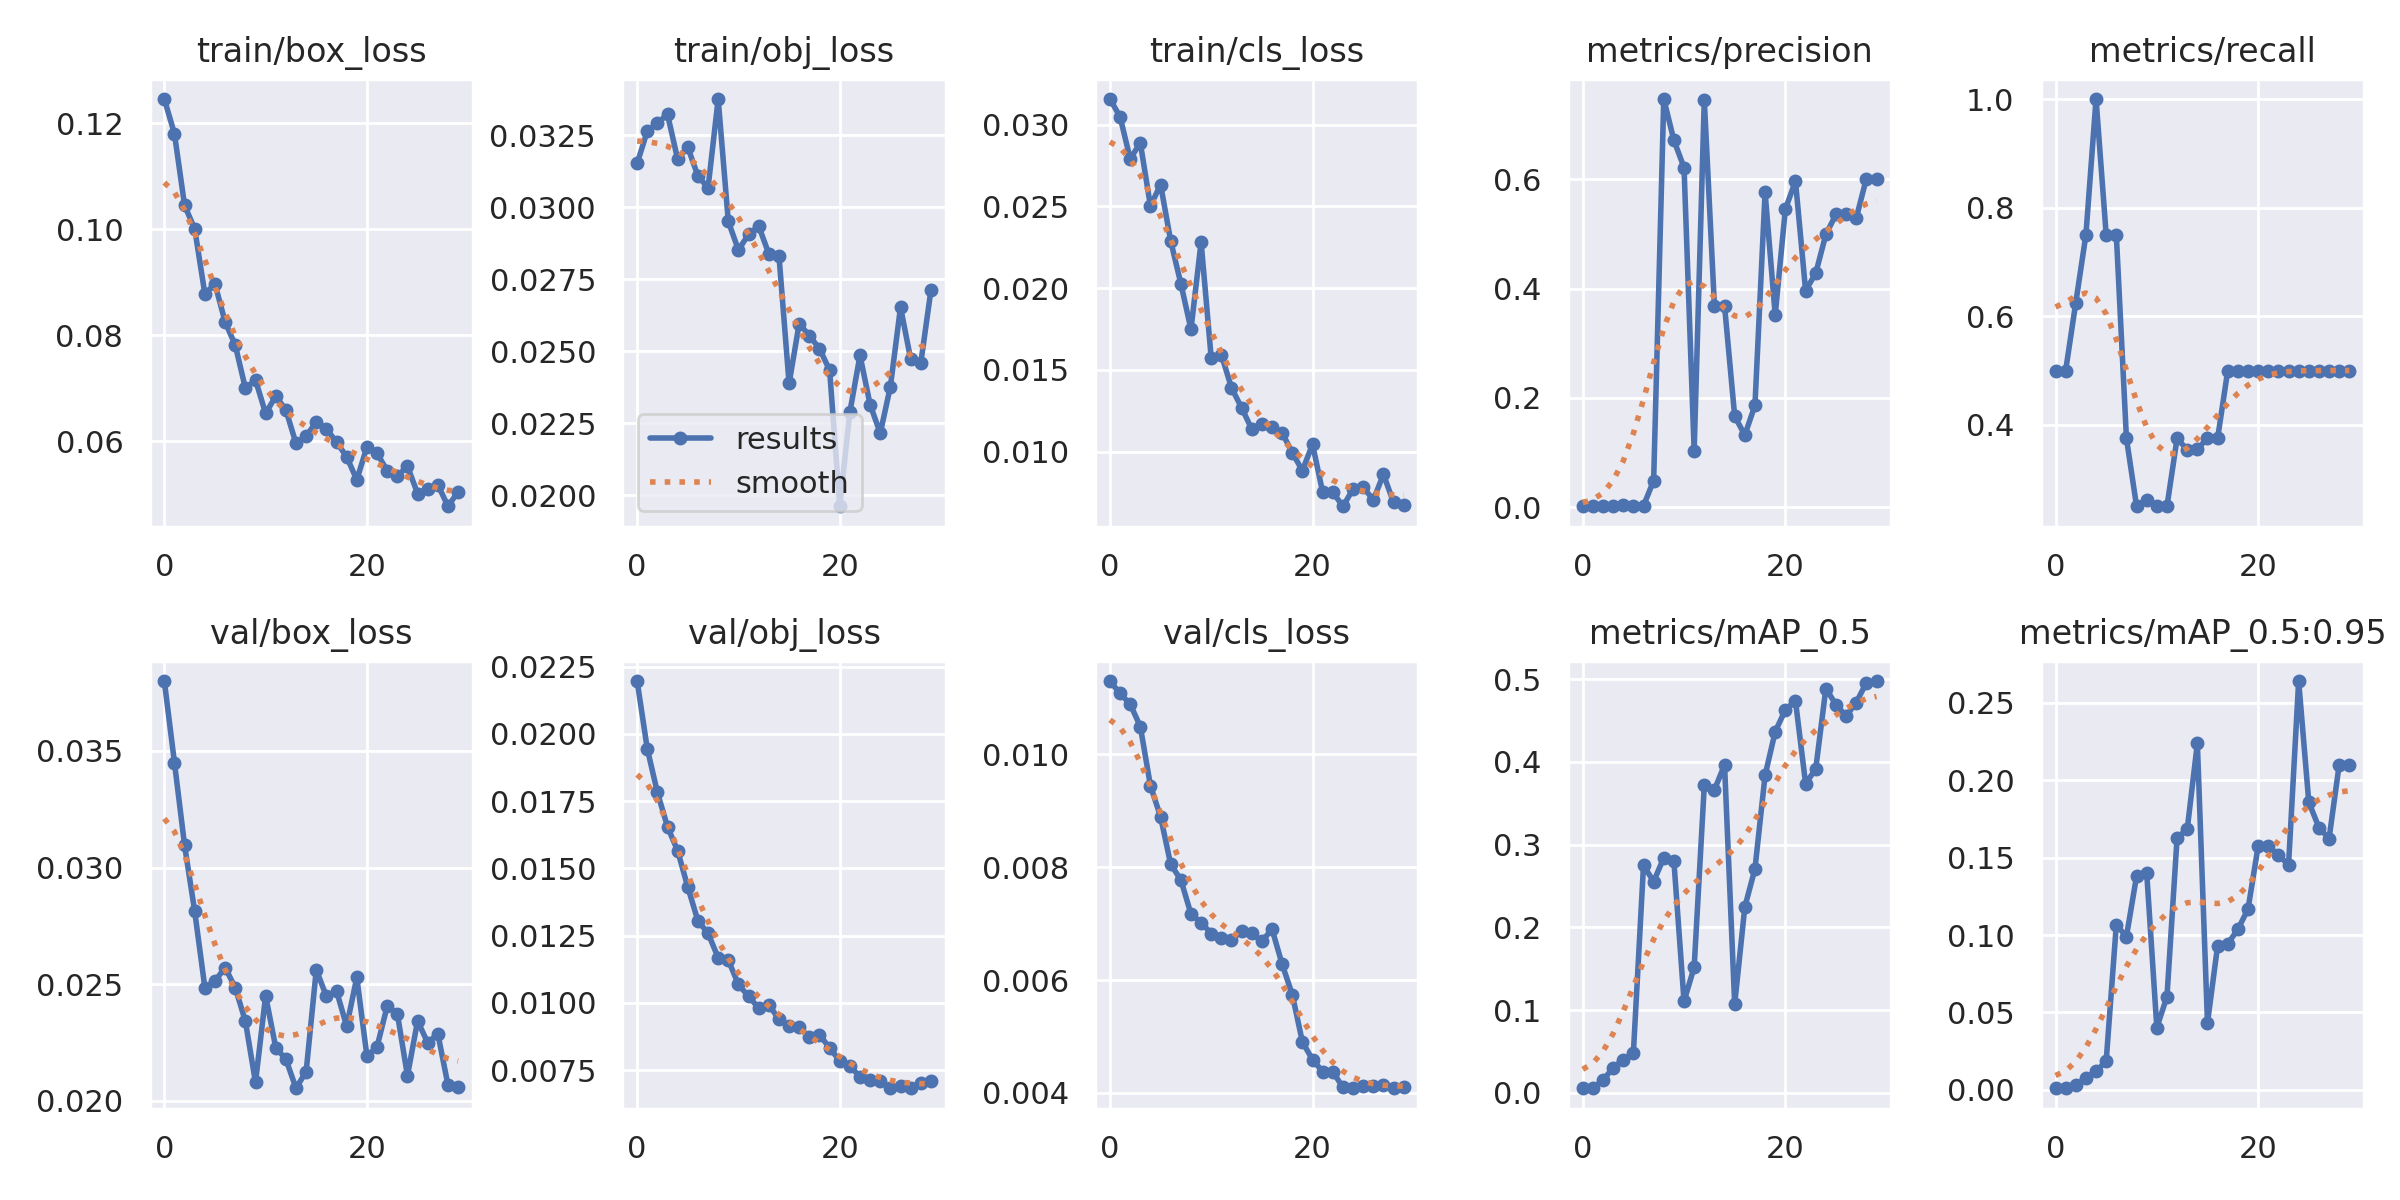

In [5]:
from IPython.display import Image
Image(filename='runs/train/treino_yolo_padrao/results.png', width=600)

### üìä An√°lise dos Gr√°ficos

O gr√°fico mostra que o modelo pr√©-treinado (`yolov5s.pt`) teve um aprendizado consistente ao longo das √©pocas.

- A m√©trica **mAP@0.5** atingiu aproximadamente **0.28**  
- A m√©trica **mAP@0.5:0.95** alcan√ßou **~0.25**

A **precis√£o (precision)** e o **recall** evolu√≠ram com o treinamento, mas os valores ainda permanecem **abaixo do modelo YOLO customizado da Entrega 1**, que apresentou melhores resultados de generaliza√ß√£o, especialmente na classe **`drone`**.

Esses gr√°ficos refor√ßam a diferen√ßa de performance entre um modelo adaptado ao dataset e um modelo gen√©rico, mesmo quando pr√©-treinado.


## üß™ Testar modelo em imagens novas

Aplicamos o modelo treinado sobre imagens novas de teste para observar qualitativamente os resultados.


In [6]:
!python detect.py --weights runs/train/treino_yolo_padrao/weights/best.pt \
--img 640 --conf 0.25 --source "/content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/images/test"

detect: weights=['runs/train/treino_yolo_padrao/weights/best.pt'], source=/content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/drive/MyDrive/FIAP/FASE': No such file or directory
YOLOv5 üöÄ 2025-4-23 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/images/test/00001.jpg: 448x640 1 drone, 30.5ms
image 2/8 /content/drive/MyDrive/FIAP/FASE 6/Entrega 2/dataset/i

## üñºÔ∏è Visualizar imagens detectadas

Visualizamos as imagens processadas pelo modelo, com bounding boxes e as respectivas classes detectadas.


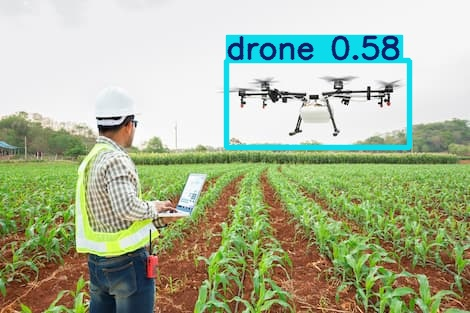

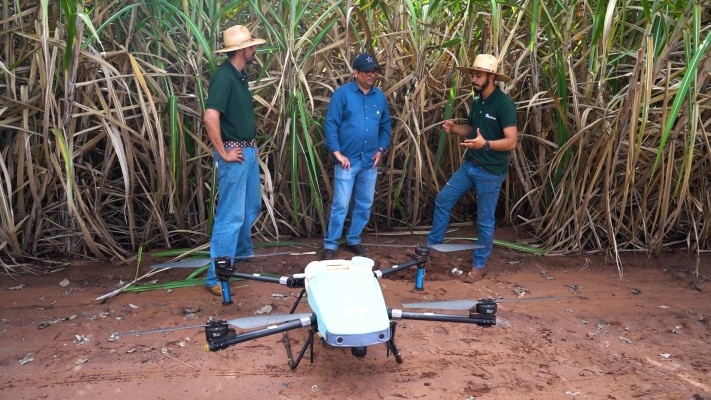

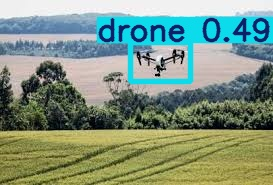

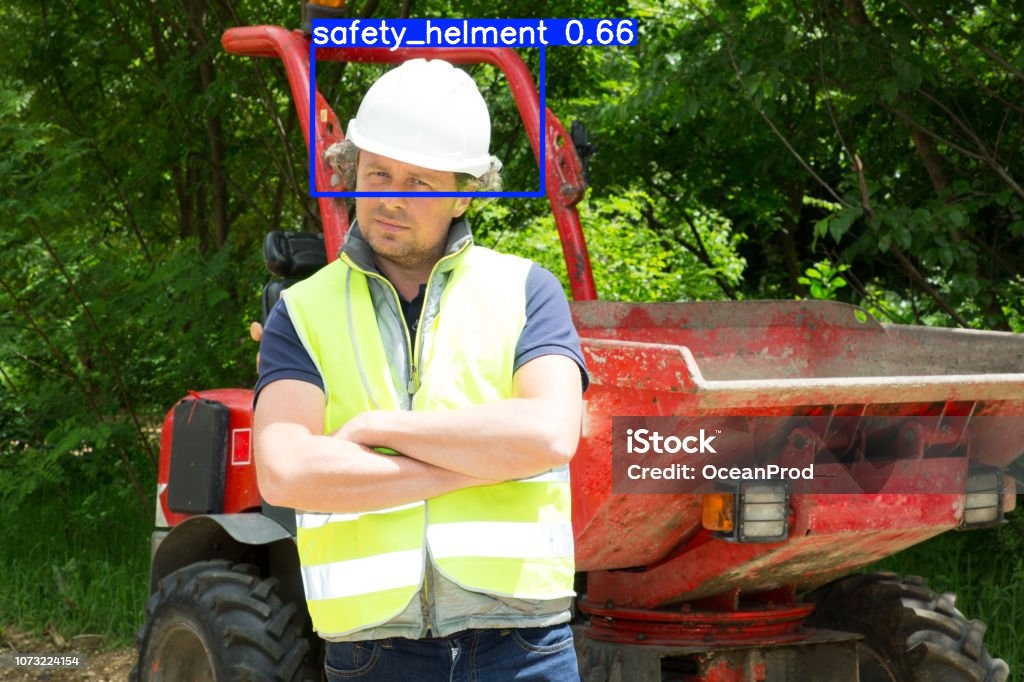

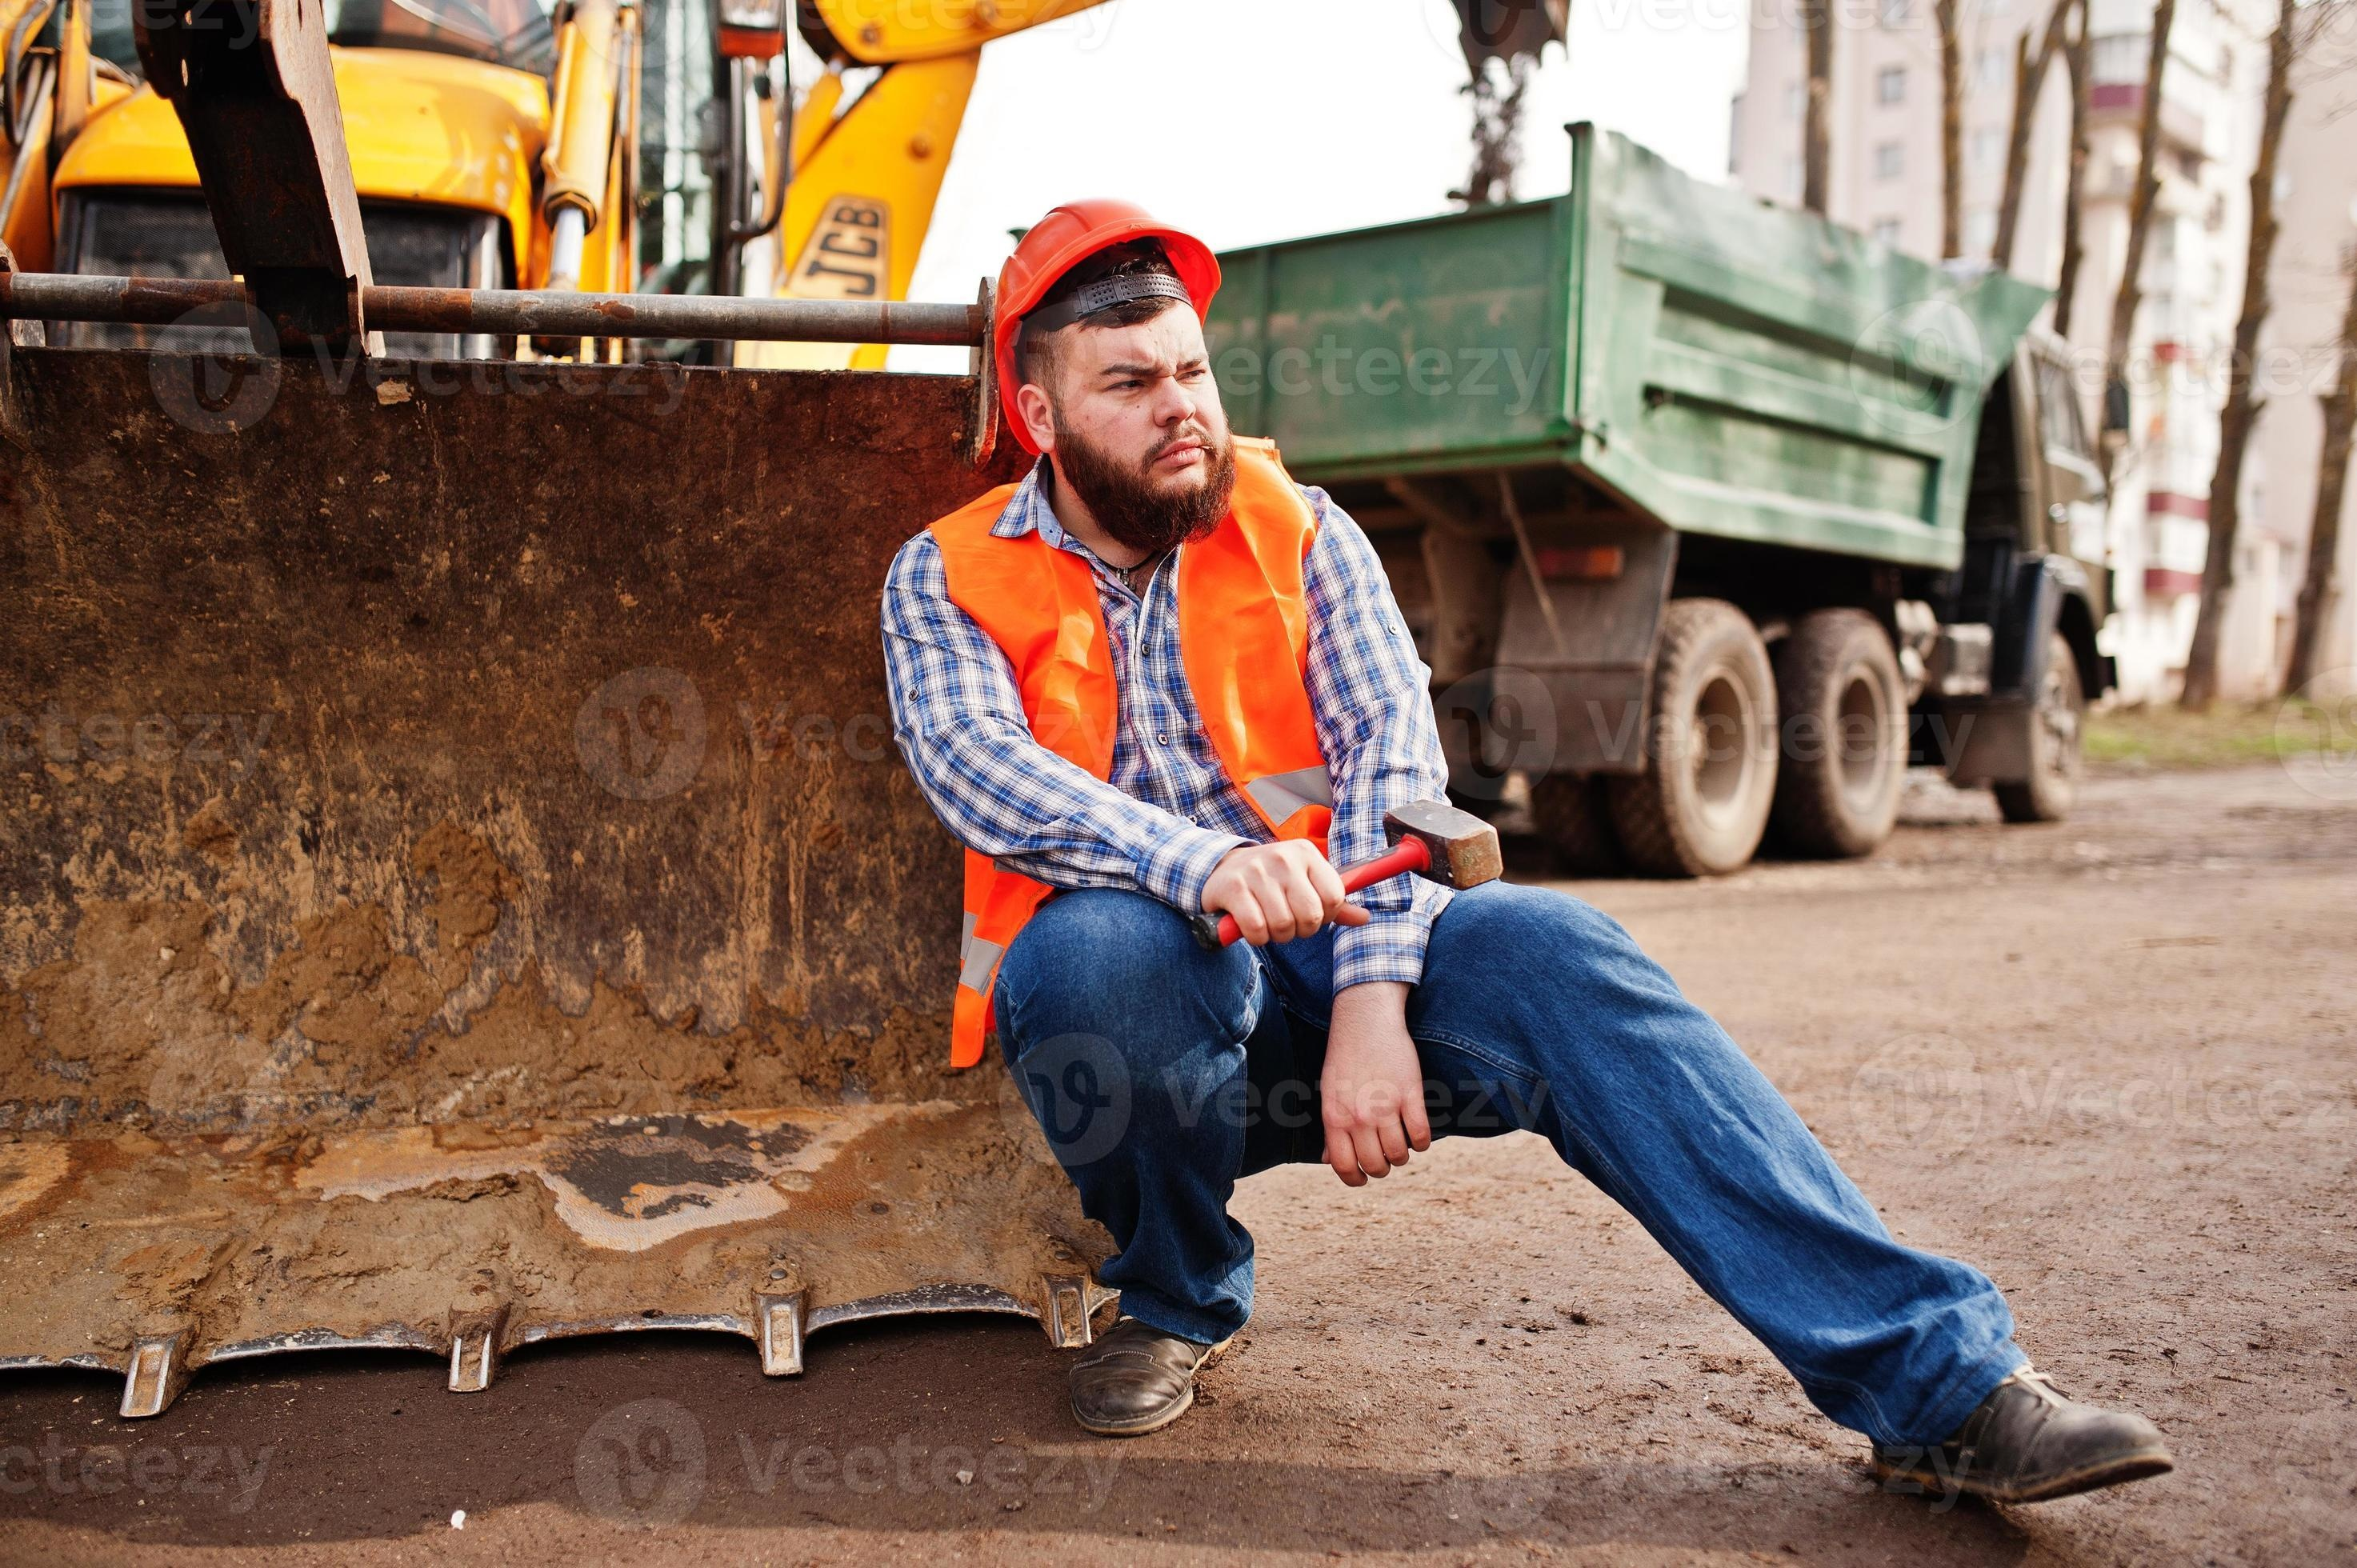

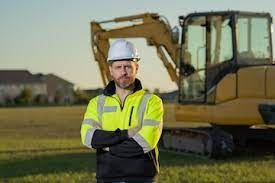

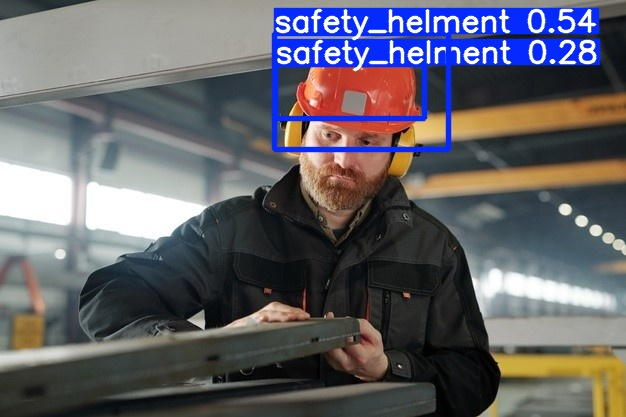

In [7]:
import os
from IPython.display import Image, display

exp_path = 'runs/detect/exp'
for image_file in os.listdir(exp_path):
    if image_file.endswith('.jpg') or image_file.endswith('.png'):
        display(Image(filename=f"{exp_path}/{image_file}", width=400))

## üìä Avalia√ß√£o Comparativa: ‚Äì YOLO Customizado vs YOLOv5 Padr√£o

Abaixo est√° uma tabela com os principais crit√©rios utilizados para comparar os dois modelos de detec√ß√£o de objetos desenvolvidos nas Entregas 1 e 2:

| Crit√©rio                         | YOLO Customizado (Entrega 1) | YOLOv5 Padr√£o (`yolov5s.pt`) |
|----------------------------------|-------------------------------|-------------------------------|
| **Facilidade de uso**            | M√©dia                         | Alta                          |
| **Precis√£o (P)**                 | 0.534                         | 0.0487                        |
| **Recall (R)**                   | 0.625                         | 0.75                          |
| **mAP@0.5**                      | 0.627                         | 0.275                         |
| **mAP@0.5:0.95**                 | 0.317                         | 0.107                         |
| **Tempo de treinamento**        | ~5 minutos                    | ~3 minutos                    |
| **Tempo de infer√™ncia**         | R√°pido                        | Muito R√°pido                  |



## üìå Conclus√£o Cr√≠tica

O modelo YOLOv5 padr√£o (`yolov5s.pt`) apresentou boa capacidade de aprendizado mesmo com poucas √©pocas, e se destacou pela **facilidade de uso**, rapidez no treinamento e infer√™ncia.

Entretanto, o modelo customizado da Entrega 1 ainda apresentou desempenho superior em termos de **mAP** e **precis√£o geral**, principalmente na classe `drone`.

A diferen√ßa de desempenho entre as classes tamb√©m aponta que o modelo padr√£o pode n√£o estar ajustado finamente para o dataset, refor√ßando a import√¢ncia de ajustes, curadoria e treinamento desde o zero em situa√ß√µes que exigem alta acur√°cia.

Ambos os modelos t√™m suas vantagens:
- O YOLOv5 padr√£o serve bem como **base r√°pida para prot√≥tipos**;
- O YOLO customizado mostra melhor desempenho **quando bem treinado e ajustado ao contexto**.

